In [3]:
from functions import from_image_to_vectors, kmeans, build_map_segments, build_quantized_image, build_map_segments_and_quantized_image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plant_insect_image_path =  "./imgs/plantas_gotas.jpg"
plant_insect_image = Image.open(plant_insect_image_path) 

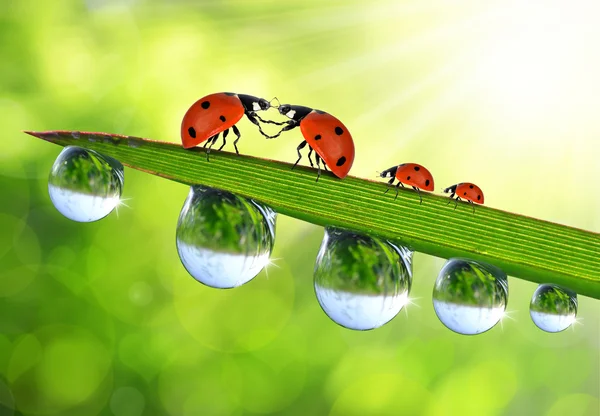

In [9]:
plant_insect_image

In [8]:
plant_array = np.array(plant_insect_image)
plant_array.shape

(416, 600, 3)

Dado que solo utiliza tres colores, transformaremos a vectores en función de ello.
Serán vectores de tres compontente RGB.

In [11]:
plant_insect_image_vectorized = from_image_to_vectors(plant_insect_image, 3)

En función de la imagen utilizada seleccionamos un número de grupos (k) a generar. A discreción seleccioné 3, esperando que se distingan fondo y algunos elementos como el insecto. 

In [13]:
pi_labels, pi_centroids = kmeans(plant_insect_image_vectorized, 3)


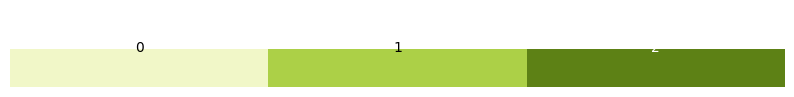

In [14]:
build_map_segments(pi_centroids, pi_labels)

En principio no parece distinguir el color rojo, que es de un elemento importante (humanamente hablando). Posiblemente esto se debe a que k-means prioriza el volumen de datos. De manera que hace una distinción mayor a tonalidades de verde a distinguir colores signficativos. 

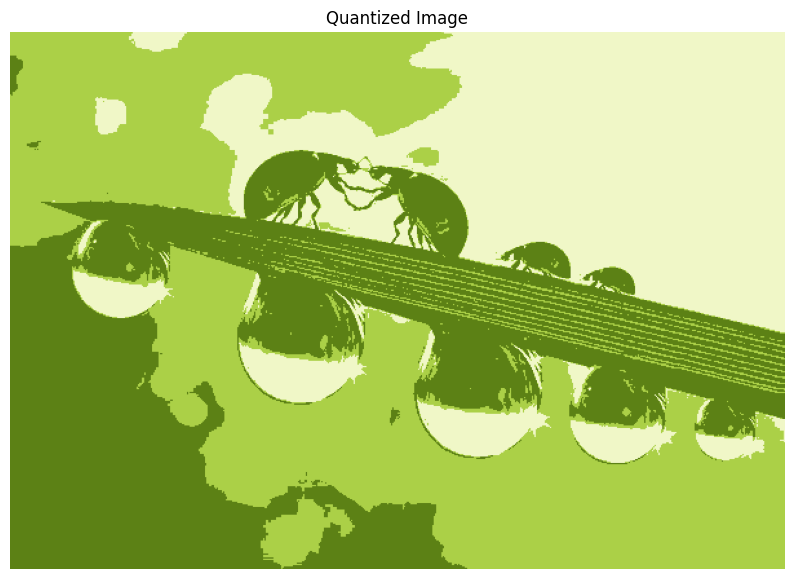

In [15]:
build_quantized_image(pi_centroids, pi_labels, plant_insect_image)

Es interesante como aun es distinguible las formas principales pero aun esta lejos de algo deseado. Podemos cambiar al cantidad de clusters esperados en función de ello. Probemos, por ejemplo "7", para incluir distintos tonos de verde y alcanzar el rojo. 

In [18]:
pi_labels, pi_centroids = kmeans(plant_insect_image_vectorized, 7)


Reached max iters


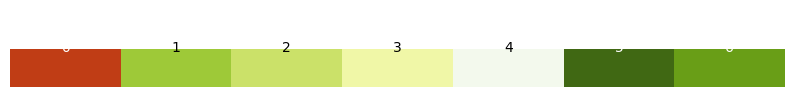

In [19]:
build_map_segments(pi_centroids, pi_labels)

Vemos que ahora si se distingue pero con ello sacrificamos la separación de otros elementos que a lo mejor hubiesemos preferido mantener juntos. En general no parece una imagen ideal para esta técnica. 

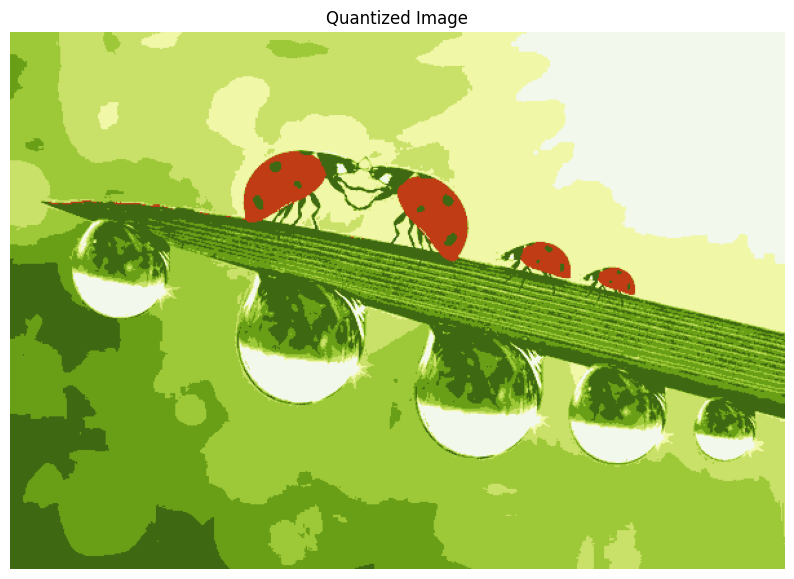

In [20]:
build_quantized_image(pi_centroids, pi_labels, plant_insect_image)

Probamos ahora con una imagen con menos tonalidades (sobre todo en el "fondo").

In [21]:
cookies_image_path =  "./imgs/cookies.jpg"
cookies_image = Image.open(cookies_image_path) 

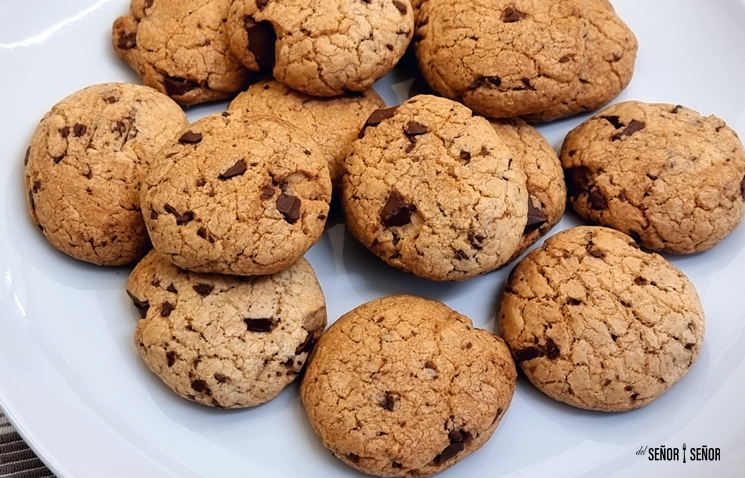

In [22]:
cookies_image

In [23]:
cookies_array = np.array(cookies_image)
cookies_array.shape

(478, 745, 3)

Nuevamente solo tenemos 3 canales. 

In [25]:
cookies_array_vectorized = from_image_to_vectors(cookies_image, 3)

A ojo vemos por lo menos 3 grupos de colores: 
- El color de la galleta por si sola
- El color de chispas y grietas. 
- Color plato

In [26]:
ck_labels, ck_centroids = kmeans(cookies_array_vectorized, 3)


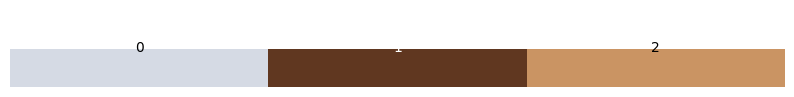

In [27]:
build_map_segments(ck_centroids, ck_labels)

Ahora si parece tener mejores resultados, pero podemos comprobarlo con la imagen cuantizada. 

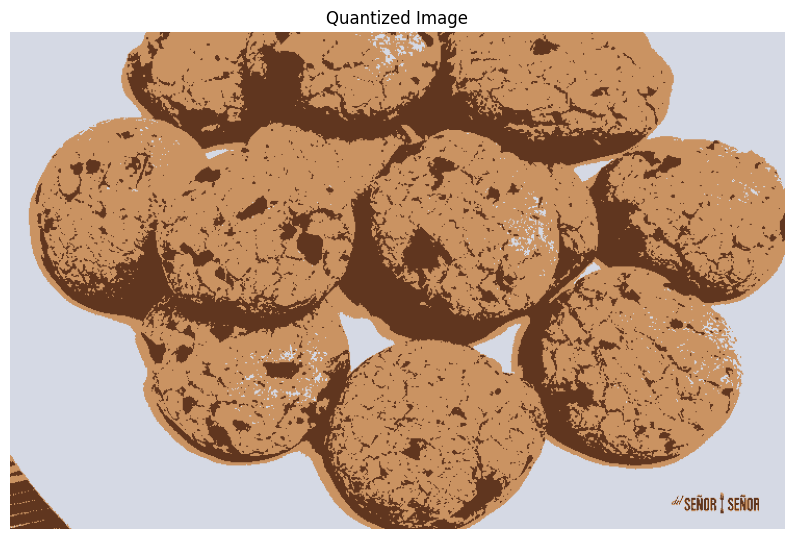

In [28]:
build_quantized_image(ck_centroids, ck_labels, cookies_image)

Con excepción a no haber considerado las sombras, los resultados son bastante buenos. 


Una de las limitaciones son el distinguir elementos distintos con un mismo color. Por tanto no permite la flexibilidad de tener sombras. 